In [2]:
pip install tweepy

     |████████████████████████████████| 147 kB 1.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [601]:
import tweepy
import requests
import pandas as pd
import json
import time
import math
import re

## importing all the libraries required

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

## getting access to twitter developer.

In [ ]:
# Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Import the tweet image predictions TSV file into a DataFrame
img_df = pd.read_csv('image_predictions-3.tsv', sep='\t')

In [ ]:
df_list = []
with open('tweet-json.txt') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
status_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

In [604]:
status_df.head()

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"


In [605]:
df_twit = pd.read_csv('twitter-archive-enhanced.csv')
df_twit.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [606]:
df_img = pd.read_csv('image-predictions-3.tsv',sep='\t')
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [607]:
df_twit.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [608]:
df_twit.info()

## getting to know about the datset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [609]:
df_twit.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [610]:
df_twit.name.value_counts().sort_index(ascending=True)

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: name, Length: 957, dtype: int64

In [611]:
df_twit.text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object

In [612]:
df_twit.source

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object

In [613]:
df_twit.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [614]:
df_twit[df_twit['rating_numerator'] < 10 ].shape


(440, 17)

In [615]:
df_twit[df_twit['rating_denominator'] != 10 ].shape


(23, 17)

In [616]:
df_twit['expanded_urls'].isnull().sum()

59

In [617]:
status_df

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"
...,...,...,...,...
2349,666049248165822465,41,111,"[0, 120]"
2350,666044226329800704,147,311,"[0, 137]"
2351,666033412701032449,47,128,"[0, 130]"
2352,666029285002620928,48,132,"[0, 139]"


In [618]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [619]:
df_twit.duplicated().sum()

0

In [620]:
df_img.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [621]:
df_img.shape

(2075, 12)

In [622]:
df_twit[df_twit['name'].str.len() <3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


## Quality

### Twitter archived table

1.in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id 
,retweeted_status_timestamp contains lot of NULL values

2.name of the dogs have lot of none value and 'a,the,this,an',etc... as text.

3.text column has unstructured long texts

4.sources contains html tags instead of just sources

5.All four column that is doggo', 'floofer', 'pupper', 'puppo', that indicate stage are none for many dogs.

6.Some rating_numerator has value less than 10

7.Some rating_denominator dont have value as 10

8.Some of data are duplicates.



## Tidiness

1.'doggo', 'floofer', 'pupper', 'puppo' must be merged to 'stage' column

2."breed" column should be added in df_twit table; its values based on p1_conf and p1_dog columns of df_img (image 
predictions) table

3.retweet_count and favorite_count columns from status_df (tweet status) table should be joined with df_twit table



### Quality

### 1.in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id ,retweeted_status_timestamp contains lot of NULL values

#### Define

These columns arent required and can be deleted

#### Code


In [623]:
df_twit.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [624]:
df_twit.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)

In [625]:
df_twit.drop(['retweeted_status_user_id','retweeted_status_timestamp','retweeted_status_id'],axis=1,inplace=True)

#### Test

In [626]:
df_twit.isnull().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         59
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

### 2.name of the dogs have lot of none value and 'a,the,this,an',etc... as text.

#### Define

Wherever names are none and there are names like a,the,etc all needs to be set as none so that it help us later to get insight about the common names our daogs have.

#### Code

In [627]:
df_twit['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [628]:
df_twit['name'].isnull().sum()

0

In [629]:
df_twit['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Donny        1
Comet        1
Tebow        1
Chubbs       1
Bowie        1
Name: name, Length: 957, dtype: int64

In [630]:
df_twit["name"].replace({"a": "None"}, inplace=True)

In [631]:
df_twit['name'].value_counts()

None       800
Charlie     12
Cooper      11
Lucy        11
Oliver      11
          ... 
Donny        1
Comet        1
Tebow        1
Chubbs       1
Bowie        1
Name: name, Length: 956, dtype: int64

In [632]:
df_twit["name"].replace({"an": "None","the":"None","this":"None"}, inplace=True)

#### Test

In [633]:
df_twit['name'].value_counts()

None       816
Charlie     12
Oliver      11
Cooper      11
Lucy        11
          ... 
Comet        1
Tebow        1
Chubbs       1
Ember        1
Bowie        1
Name: name, Length: 953, dtype: int64

### 3.text column has unstructured long texts

#### Define:

Many texts in this column arent structured properly and need to be cleaned.The links and ratings at the end needs to be removed.

#### Code:

In [634]:
df_twit['text'].isnull().sum()

0

In [635]:
df_twit['text'] = df_twit['text'].map(lambda x: str(x)[:-23])

### Test

In [636]:
df_twit['text'].iloc[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 "

### 4.sources contains html tags instead of just sources

#### Define:

We dont want tags for urls instead the sources alone.

#### Code:

In [637]:
df_twit.source = df_twit.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

#### Test

In [638]:
df_twit.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2356, dtype: object

In [639]:
df_twit.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### 5.All four column that is doggo', 'floofer', 'pupper', 'puppo', that indicate stage are none for many dogs.

#### Define:
Atleast one stage needs to be there in any one of the 4 column , it cant be more than one or none at all.

#### Code:


In [640]:
for i, row in df_twit[((df_twit.doggo != 'None') & (df_twit.floofer != 'None'))
                   | ((df_twit.doggo != 'None') & (df_twit.puppo != 'None'))].iterrows():
    print('%s %s\n'%(row.tweet_id, row.text))

855851453814013952 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for 

854010172552949760 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs 



In [641]:
# based on the above texts, doggo should be set as None for both the records
df_twit['doggo'][df_twit.tweet_id.isin([855851453814013952, 854010172552949760])] = 'None'

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [642]:
df_twit['pupper'][(df_twit.doggo != 'None') & (df_twit.pupper != 'None')] = 'None'

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Test

In [643]:
len(df_twit[((df_twit.doggo != 'None') & (df_twit.pupper != 'None'))
                  | ((df_twit.doggo != 'None') & (df_twit.floofer != 'None')) 
                  | ((df_twit.doggo != 'None') & (df_twit.puppo != 'None'))])

0

### 6.Some rating_numerator has value less than 10

#### Define:
For all those records whose rating numerator is either less than or equal to 10 or greater than 10 but has a very high value, check if the text contains any fraction whose denominator is 10. If it does, update the rating_numerator with the numerator value of this fraction.

#### Code:

In [644]:
df_twit['rating_numerator'].value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [645]:
df_twit["rating_numerator"].replace({1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}, inplace=True)

In [646]:
df_twit[df_twit["rating_numerator"] > 15] = 0

#### Test

In [647]:
df_twit['rating_numerator'].value_counts().sort_index()

0     466
10    461
11    464
12    558
13    351
14     54
15      2
Name: rating_numerator, dtype: int64

### 7.Some rating_denominator dont have value as 10

#### Define: 
Make all rating dinominator as 10

#### Code:

In [648]:
df_twit["rating_dinominator"] = 10

#### Test:

In [649]:
df_twit['rating_dinominator'].value_counts().sort_index()

10    2356
Name: rating_dinominator, dtype: int64

### 8.Some of data are duplicates.

#### Define: 
Remove the duplicated rows.

#### Code:


In [650]:
df_twit = df_twit.drop_duplicates()

#### Test:

In [651]:
df_twit.duplicated().sum()

0

### Tidiness

### 1.'doggo', 'floofer', 'pupper', 'puppo' must be merged to 'stage' column

#### Define:
All these needs to be merged together into one column for better visualization.

#### Code:

In [652]:
df_twit['stage'] = df_twit[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [653]:
df_twit.stage = df_twit.stage.astype('category')

In [654]:
df_twit.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test:

In [655]:
df_twit.stage.value_counts()

None       1951
pupper      244
doggo        95
puppo        30
floofer      10
0             1
Name: stage, dtype: int64

### 2."breed" column should be added in df_twit table; its values based on p1_conf and p1_dog columns of df_img (image predictions) table

### 3.retweet_count and favorite_count columns from status_df (tweet status) table should be joined with df_twit table

#### Code: 

In [656]:
df_twit['breed'] = 'None'
df_twit['retweet_count'] = 0
df_twit['favorite_count'] = 0

In [659]:
df_twit.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'rating_dinominator',
       'stage', 'breed', 'retweet_count', 'favorite_count'],
      dtype='object')

In [677]:
df_twit.favorite_count

0       39467
1       39467
2       39467
3       39467
4       39467
        ...  
2351    39467
2352    39467
2353    39467
2354    39467
2355    39467
Name: favorite_count, Length: 2331, dtype: int64

In [679]:
status_df.drop(['display_text_range'],axis=1,inplace=True)

In [680]:
status_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [731]:
df_merge = pd.merge(df_twit, status_df, on='tweet_id')

In [732]:
df_merge.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_dinominator,stage,breed,retweet_count_x,favorite_count_x,retweet_count_y,favorite_count_y
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,10,None,NaN,8853,39467,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,10,None,NaN,8853,39467,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,10,None,NaN,8853,39467,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,10,None,NaN,8853,39467,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,10,None,NaN,8853,39467,9774,41048


In [733]:
df_merge.drop(['retweet_count_x','favorite_count_x'],axis=1,inplace=True)

In [734]:
df_merge.rename(columns = {'retweet_count_y':'retweet_count','favorite_count_y':'favorite_count'}, inplace = True) 

In [735]:
df_img.head()

,tweet_id,p1
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


In [691]:
df_img.drop(['jpg_url','img_num','p1_conf','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1,inplace=True)

In [692]:
df_img

,tweet_id,p1,p1_dog
0,666020888022790149,Welsh_springer_spaniel,True
1,666029285002620928,redbone,True
2,666033412701032449,German_shepherd,True
3,666044226329800704,Rhodesian_ridgeback,True
4,666049248165822465,miniature_pinscher,True
...,...,...,...
2070,891327558926688256,basset,True
2071,891689557279858688,paper_towel,False
2072,891815181378084864,Chihuahua,True
2073,892177421306343426,Chihuahua,True


In [695]:
df_img.drop(df_img[df_img['p1_dog'] == False].index, inplace=True)

In [696]:
df_img

,tweet_id,p1,p1_dog
0,666020888022790149,Welsh_springer_spaniel,True
1,666029285002620928,redbone,True
2,666033412701032449,German_shepherd,True
3,666044226329800704,Rhodesian_ridgeback,True
4,666049248165822465,miniature_pinscher,True
...,...,...,...
2068,890971913173991426,Appenzeller,True
2069,891087950875897856,Chesapeake_Bay_retriever,True
2070,891327558926688256,basset,True
2072,891815181378084864,Chihuahua,True


In [739]:
df_merge.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_dinominator,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,10,None,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,10,None,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,10,None,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,10,None,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,10,None,9774,41048


In [741]:
df_merge.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

#### Test:

In [742]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_dinominator,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,10,None,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,10,None,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,10,None,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,10,None,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,10,None,9774,41048


In [743]:
df.stage.value_counts()

None       1950
pupper      243
doggo        95
puppo        30
floofer      10
Name: stage, dtype: int64

## Analysis:

In [756]:
df.info()
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2328 non-null   int64 
 1   timestamp           2328 non-null   object
 2   source              2328 non-null   object
 3   text                2322 non-null   object
 4   expanded_urls       2275 non-null   object
 5   rating_numerator    2328 non-null   int64 
 6   rating_denominator  2328 non-null   int64 
 7   name                2328 non-null   object
 8   rating_dinominator  2328 non-null   int64 
 9   stage               2328 non-null   object
 10  retweet_count       2328 non-null   int64 
 11  favorite_count      2328 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 218.4+ KB


Analysis of the largest tweet based on th year

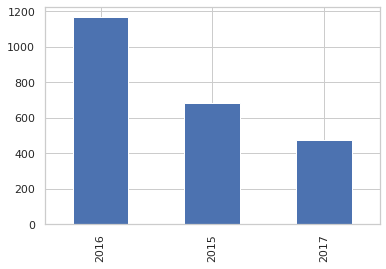

In [776]:
pd.DatetimeIndex(df['timestamp']).year.value_counts().plot(kind='bar');

### 1.Here we can see that year 2016 had the highest number of tweets followed by 2015 and 2017

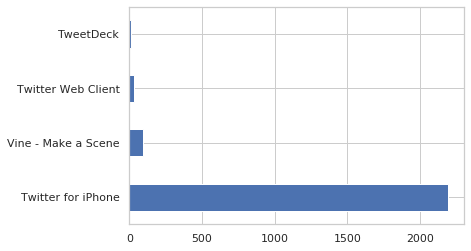

In [779]:
df.source.value_counts().plot(kind='barh');

### 2.Most of the tweets have come from mobile devices through the twitter app.

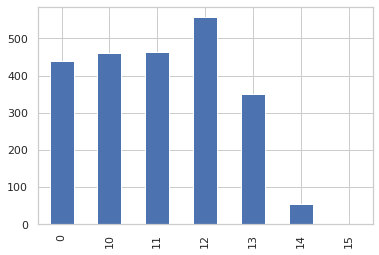

In [781]:
df['rating_numerator'].value_counts().sort_index().plot(kind='bar')

### 3.Highest ratings is 12 that is more than 500 tweets. Lowest being 15.

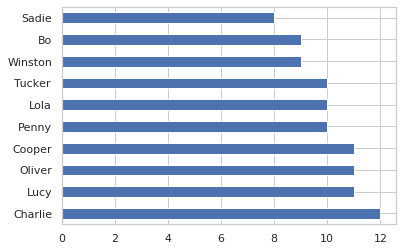

In [791]:
names = df.drop(df[df['name'] == 'None'].index) 
names.name.value_counts().iloc[:10].plot(kind='barh')

### 4.Charlie is the highest used name for dogs .

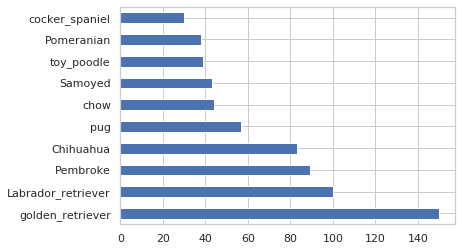

In [795]:
df_img.p1.value_counts().iloc[:10].plot(kind='barh')

### 5.Golden retriever is the highest breed that came up in tweets followed by labrador.

In [797]:
retweet = df.retweet_count.mean()
fav = df.favorite_count.mean()


In [799]:
fav

8122.897766323024

In [800]:
retweet

3181.1829896907216

### 6.Mean retweet count is 3181 and favored count is 8122